In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression

In [2]:
grad_df = pd.read_csv('Admission_Predict.csv')

In [3]:
grad_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


No missing values. 

This dataset contains several important factors for admissions to a Masters program.  These variables will be used to predict the outcome of interest - chance of admittance.  

In [5]:
#Going to drop Serial No. column - has no useful information
grad_df = grad_df.drop(['Serial No.'], axis=1)

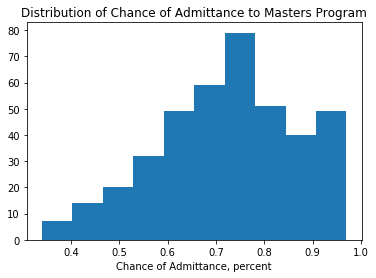

Mean: 0.72435
Median: 0.73
Mode: 0    0.64
dtype: float64


In [6]:
#Exploring variable of interest
plt.hist(grad_df['Chance of Admit '])
plt.xlabel('Chance of Admittance, percent')
plt.title('Distribution of Chance of Admittance to Masters Program')
plt.show()

print('Mean: {}'.format(grad_df['Chance of Admit '].mean()))
print('Median: {}'.format(grad_df['Chance of Admit '].median()))
print('Mode: {}'.format(grad_df['Chance of Admit '].mode()))

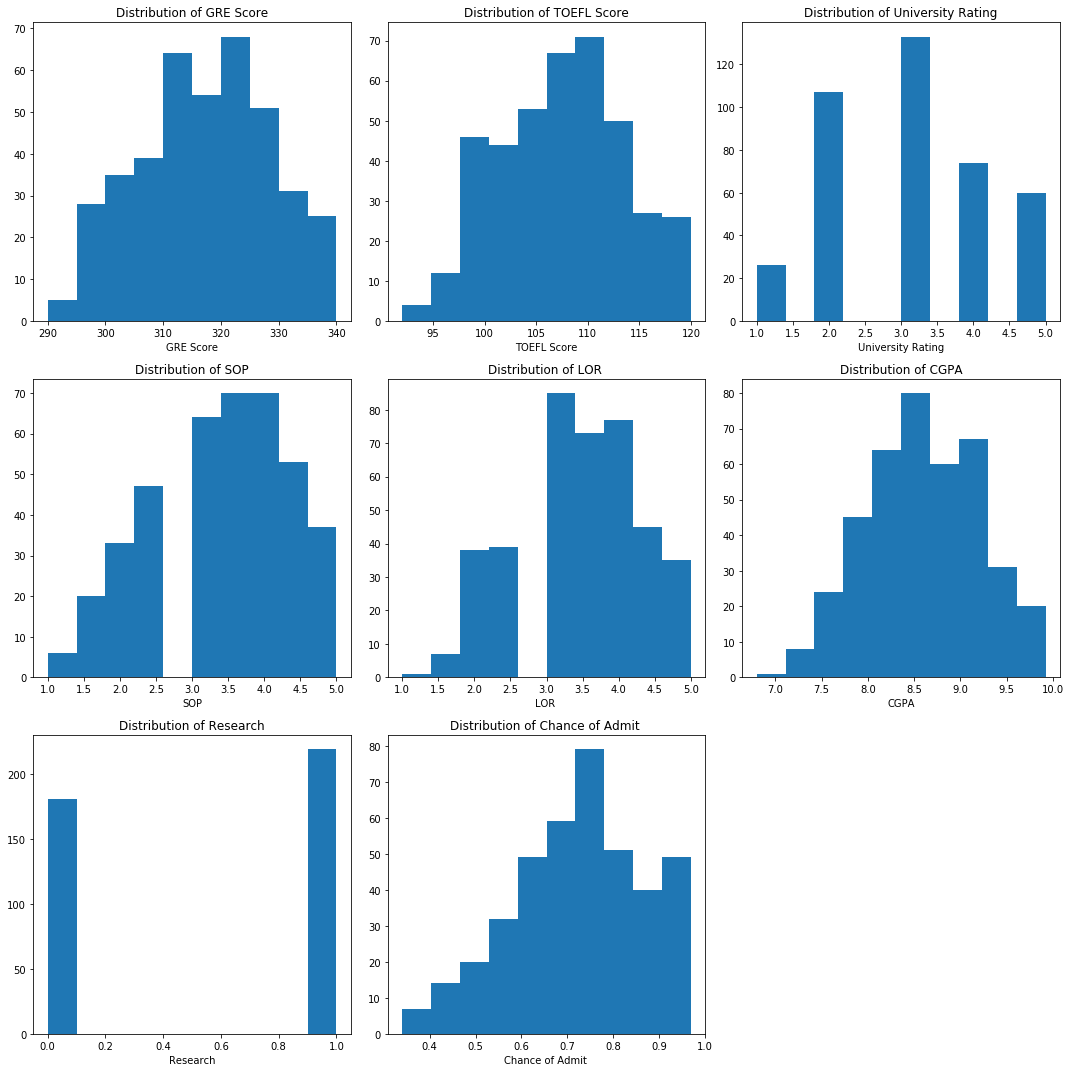

In [7]:
#Exploring distribution of all the features
all_columns = grad_df.columns

plt.figure(figsize=(15, 15))
for i in range(len(all_columns)):    
    plt.subplot(3,3,i+1)
    plt.hist(grad_df[all_columns[i]])
    plt.title('Distribution of ' + all_columns[i])
    plt.xlabel(all_columns[i])

plt.tight_layout()
plt.show()

In [8]:
#Exploring correlation of features
grad_df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [9]:
#Correlation of features with variable of interest - Chance of Admit
grad_df.corr().loc[:,'Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit , dtype: float64

In [10]:
#Create train and test sets
train , test = train_test_split(grad_df, test_size = 0.3)

x_train = train.drop('Chance of Admit ', axis=1)
y_train = train['Chance of Admit ']

x_test = test.drop('Chance of Admit ', axis = 1)
y_test = test['Chance of Admit ']

In [11]:
#Normalizing variables 

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [12]:
#to store rmse values for different K
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.09814530044785638
RMSE value for k=  2 is: 0.07669202479180393
RMSE value for k=  3 is: 0.0763235073734022
RMSE value for k=  4 is: 0.07776533878706289
RMSE value for k=  5 is: 0.07330052296311854
RMSE value for k=  6 is: 0.07434295528158671
RMSE value for k=  7 is: 0.07237186659766302
RMSE value for k=  8 is: 0.07092203392341011
RMSE value for k=  9 is: 0.06781419786518723
RMSE value for k=  10 is: 0.0674483135445209
RMSE value for k=  11 is: 0.0667733306489231
RMSE value for k=  12 is: 0.06629728396481345
RMSE value for k=  13 is: 0.0662779843021483
RMSE value for k=  14 is: 0.06618294964059286
RMSE value for k=  15 is: 0.06636629555116953
RMSE value for k=  16 is: 0.0661049414283834
RMSE value for k=  17 is: 0.06623415786299444
RMSE value for k=  18 is: 0.06786850712413865
RMSE value for k=  19 is: 0.06829546503819277
RMSE value for k=  20 is: 0.06931797205631451


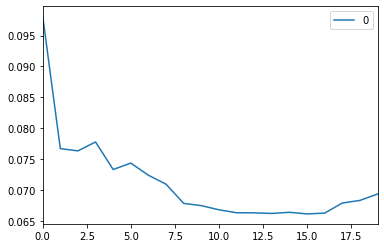

In [13]:
#Plotting the rmse values against K values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [14]:
 model = neighbors.KNeighborsRegressor(n_neighbors = K)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
pred

array([0.654 , 0.6495, 0.681 , 0.756 , 0.668 , 0.8205, 0.826 , 0.6845,
       0.653 , 0.504 , 0.6315, 0.615 , 0.5325, 0.6425, 0.5945, 0.6935,
       0.8245, 0.7165, 0.7525, 0.7895, 0.7445, 0.6685, 0.7245, 0.6355,
       0.8575, 0.6675, 0.794 , 0.584 , 0.6095, 0.5055, 0.677 , 0.4935,
       0.6375, 0.9045, 0.6885, 0.742 , 0.8805, 0.808 , 0.575 , 0.782 ,
       0.6655, 0.782 , 0.5   , 0.7835, 0.6245, 0.891 , 0.6725, 0.9285,
       0.571 , 0.9245, 0.673 , 0.715 , 0.8585, 0.8865, 0.5   , 0.6915,
       0.932 , 0.641 , 0.6125, 0.6665, 0.504 , 0.616 , 0.5015, 0.8665,
       0.575 , 0.7665, 0.7555, 0.556 , 0.645 , 0.6825, 0.8435, 0.803 ,
       0.9155, 0.619 , 0.504 , 0.6665, 0.932 , 0.51  , 0.6215, 0.5725,
       0.5145, 0.686 , 0.7225, 0.8175, 0.9325, 0.7235, 0.8315, 0.696 ,
       0.5035, 0.5715, 0.78  , 0.8765, 0.774 , 0.6715, 0.6635, 0.8185,
       0.661 , 0.545 , 0.6675, 0.74  , 0.8985, 0.507 , 0.7875, 0.6125,
       0.6365, 0.5525, 0.6475, 0.91  , 0.8305, 0.917 , 0.8115, 0.748 ,
      

In [15]:
score = cross_val_score(model, x_train, y_train, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.72 (+/- 0.08)


In [16]:
#OLS 

all_columns = grad_df.drop(['Chance of Admit '], axis=1)

#Setting variables
X = all_columns 
Y = grad_df['Chance of Admit ']
            
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

c:\users\am\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 06 Oct 2019   Prob (F-statistic):          3.12e-134
Time:                        22:18:48   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2594      0.125    -10.097      0.000      -1.505      -1.014
GRE Score             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFL Score           0.0029      0.001      2.680      0.008       0.001       0.005
University Rating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP                  -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR                   0.0224      0.006      4.034      0.000       0.011       0.033
CGPA                  0.1189      0.012      9.734      0.000       0.095       0.143
Research              0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""